In [1]:
import os
import numpy as np
caffe_root = '/home/flathead/bitbucket/mycaffe/'
os.chdir('../../')
import sys
sys.path.insert(0, 'python')
import caffe

In [2]:
from pylab import *
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
from numpy.random import normal

In [ ]:
caffe.set_mode_gpu()
caffe.set_device(0)

In [5]:
net1 = caffe.Net('examples/mlp/test/mlp_train_test.prototxt',
                'examples/mlp/test/test_iter_10000.caffemodel', 
                 caffe.TEST)

In [6]:
feat1 = net1.params['ip1'][0].data
feat2 = net1.params['ip2'][0].data
feat3 = net1.params['ip3'][0].data
#feat4 = net1.params['ip4'][0].data

In [7]:
l1 = 200
l2 = 200
l3 = 10
#l4 = 10

'\nplt.subplot(4,1,4)\nplt.hist(feat4.flat, bins = 100)\nplt.title("Last layer")\n'

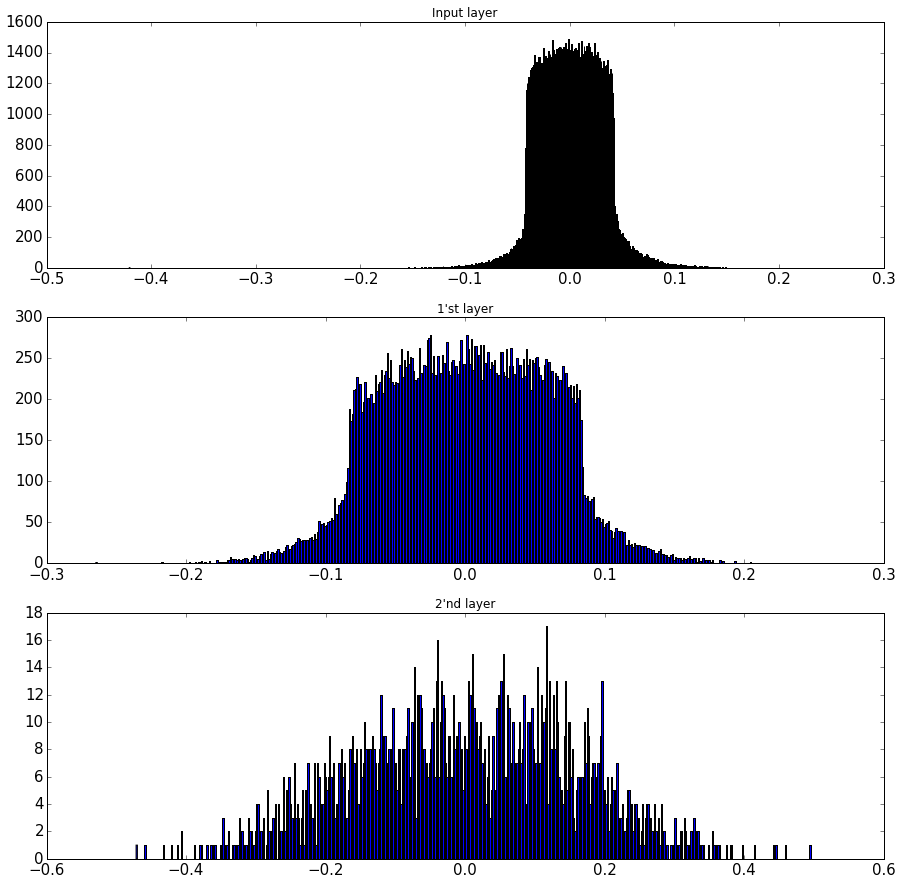

In [10]:
plt.figure(figsize=(15, 15))
#'''
plt.subplot(3,1,1)
plt.hist(feat1.flat, bins = 800)
plt.title("Input layer")

plt.subplot(3,1,2)
plt.hist(feat2.flat, bins = 500)
plt.title("1'st layer")
#'''
plt.subplot(3,1,3)
plt.hist(feat3.flat, bins = 500)
plt.title("2'nd layer")
'''
plt.subplot(4,1,4)
plt.hist(feat4.flat, bins = 100)
plt.title("Last layer")
'''

In [11]:
#Neurons of Layer 1
mean_feat1 = zeros(l1)
std_feat1 = zeros(l1)

for j in range(l1):
    mean_feat1[j] = feat1[j].mean()
    std_feat1[j] = feat1[j].std()
    
#Neurons of Layer 2
mean_feat2 = zeros(l2)
std_feat2 = zeros(l2)

for j in range(l2):
    mean_feat2[j] = feat2[j].mean()
    std_feat2[j] = feat2[j].std()
    
#Neurons of Layer 3
mean_feat3 = zeros(l3)
std_feat3 = zeros(l3)

for j in range(l3):
    mean_feat3[j] = feat3[j].mean()
    std_feat3[j] = feat3[j].std()
'''    
#Neurons of Layer 4
mean_feat4 = zeros(l4)
std_feat4 = zeros(l4)

for j in range(l4):
    mean_feat4[j] = feat4[j].mean()
    std_feat4[j] = feat4[j].std()
'''

'    \n#Neurons of Layer 4\nmean_feat4 = zeros(l4)\nstd_feat4 = zeros(l4)\n\nfor j in range(l4):\n    mean_feat4[j] = feat4[j].mean()\n    std_feat4[j] = feat4[j].std()\n'

In [ ]:
#Neurons of Layer 1
posm_feat1 = zeros(l1)
negm_feat1 = zeros(l1)
poss_feat1 = zeros(l1)
negs_feat1 = zeros(l1)

for j in range(l1):
    posm_feat1[j] = feat1[j][feat1[j] > 0].mean()
    negm_feat1[j] = feat1[j][feat1[j] < 0].mean()
    poss_feat1[j] = feat1[j][feat1[j] > 0].std()
    negs_feat1[j] = feat1[j][feat1[j] < 0].std()
    
#Neurons of Layer 2
posm_feat2 = zeros(l2)
negm_feat2 = zeros(l2)
poss_feat2 = zeros(l2)
negs_feat2 = zeros(l2)

for j in range(l2):
    posm_feat2[j] = feat2[j][feat2[j] > 0].mean()
    negm_feat2[j] = feat2[j][feat2[j] < 0].mean()
    poss_feat2[j] = feat2[j][feat2[j] > 0].std()
    negs_feat2[j] = feat2[j][feat2[j] < 0].std()

#'''
#Neurons of Layer 3
posm_feat3 = zeros(l3)
negm_feat3 = zeros(l3)
poss_feat3 = zeros(l3)
negs_feat3 = zeros(l3)

for j in range(l3):
    posm_feat3[j] = feat3[j][feat3[j] > 0].mean()
    negm_feat3[j] = feat3[j][feat3[j] < 0].mean()
    poss_feat3[j] = feat3[j][feat3[j] > 0].std()
    negs_feat3[j] = feat3[j][feat3[j] < 0].std()
#'''
#Neurons of Layer 4
posm_feat4 = zeros(l4)
negm_feat4 = zeros(l4)
poss_feat4 = zeros(l4)
negs_feat4 = zeros(l4)

for j in range(l4):
    posm_feat4[j] = feat4[j][feat4[j] > 0].mean()
    negm_feat4[j] = feat4[j][feat4[j] < 0].mean()
    poss_feat4[j] = feat4[j][feat4[j] > 0].std()
    negs_feat4[j] = feat4[j][feat4[j] < 0].std()
#'''

In [ ]:
# rate * std range zero pruning
rate = 0.6

for x in range(l1):
    for y in range(784):
        #if ((feat1[x,y] >= -a2[x]) & (feat1[x,y] <= a1[x])):
        if ((feat1[x,y] >= -std_feat1[x] * rate) & (feat1[x,y] <= rate * std_feat1[x])):
            feat1[x,y] = 0
            
for x in range(l2):
    for y in range(l1):
        #if (feat2[x,y] >= -b2[x]) & (feat2[x,y] <= b1[x]):
        if ((feat2[x,y] >= -std_feat2[x] * rate) & (feat2[x,y] <= rate * std_feat2[x])):
            feat2[x,y] = 0
            
for x in range(l3):
    for y in range(l2):
        #if (feat3[x,y] >= -c2[x]) & (feat3[x,y] <= c1[x]):
        if ((feat3[x,y] >= -std_feat3[x] * rate) & (feat3[x,y] <= rate * std_feat3[x])):
            feat3[x,y] = 0
            
for x in range(l4):
    for y in range(l3):
        #if (feat4[x,y] >= -d2[x]) & (feat4[x,y] <= d1[x]):
        if ((feat4[x,y] >= -std_feat4[x] * rate) & (feat4[x,y] <= rate * std_feat4[x])):
            feat4[x,y] = 0

In [ ]:
net1.save('examples/mlp/zeropr/pruned.caffemodel')

In [ ]:
ratio = zeros(4)

for x in range(l1):
    ratio[0] += (feat1[x] ==  0).sum()

for x in range(l2):
    ratio[1] += (feat2[x] ==  0).sum()
    
for x in range(l3):
    ratio[2] += (feat3[x] ==  0).sum()
    
for x in range(l4):
    ratio[3] += (feat4[x] ==  0).sum()

print (ratio[0] / (784 * l1), ratio[1] / (l2 * l1), ratio[2] / (l3 * l2), ratio[3] / (l4 * l3))
print ((ratio[0] + ratio[1] + ratio[2] + ratio[3]) / (784 * l1 + l1 * l2 + l2 * l3 + l3 * l4))

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(4,1,1)
plt.hist(feat1[feat1 != 0].flat, bins = 784)
plt.title("Input layer")

plt.subplot(4,1,2)
plt.hist(feat2[feat2 != 0].flat, bins = 500)
plt.title("1'st layer")

plt.subplot(4,1,3)
plt.hist(feat3[feat3 != 0].flat, bins = 500)
plt.title("2'nd layer")

plt.subplot(4,1,4)
plt.hist(feat4[feat4 != 0].flat, bins = 2000)
plt.title("Last layer")

In [ ]:
# Retraining is required Here!

In [ ]:
#'''
#Neurons of Layer 1
posm_feat1 = [0] * l1
negm_feat1 = [0] * l1
poss_feat1 = [0] * l1
negs_feat1 = [0] * l1

for j in range(l1):
    posm_feat1[j] = feat1[j][feat1[j] > 0].mean()
    negm_feat1[j] = feat1[j][feat1[j] < 0].mean()
    poss_feat1[j] = feat1[j][feat1[j] > 0].std()
    negs_feat1[j] = feat1[j][feat1[j] < 0].std()
#''' 
#Neurons of Layer 2
posm_feat2 = [0] * l2
negm_feat2 = [0] * l2
poss_feat2 = [0] * l2
negs_feat2 = [0] * l2

for j in range(l2):
    posm_feat2[j] = feat2[j][feat2[j] > 0].mean()
    negm_feat2[j] = feat2[j][feat2[j] < 0].mean()
    poss_feat2[j] = feat2[j][feat2[j] > 0].std()
    negs_feat2[j] = feat2[j][feat2[j] < 0].std()

#'''
#Neurons of Layer 3
posm_feat3 = [0] * l3
negm_feat3 = [0] * l3
poss_feat3 = [0] * l3
negs_feat3 = [0] * l3

for j in range(l3):
    posm_feat3[j] = feat3[j][feat3[j] > 0].mean()
    negm_feat3[j] = feat3[j][feat3[j] < 0].mean()
    poss_feat3[j] = feat3[j][feat3[j] > 0].std()
    negs_feat3[j] = feat3[j][feat3[j] < 0].std()
#'''
#Neurons of Layer 4
posm_feat4 = [0] * l4
negm_feat4 = [0] * l4
poss_feat4 = [0] * l4
negs_feat4 = [0] * l4

for j in range(l4):
    posm_feat4[j] = feat4[j][feat4[j] > 0].mean()
    negm_feat4[j] = feat4[j][feat4[j] < 0].mean()
    poss_feat4[j] = feat4[j][feat4[j] > 0].std()
    negs_feat4[j] = feat4[j][feat4[j] < 0].std()
#'''

In [ ]:
# Mean value Quantization

for x in range(l1):
    for y in range(784):
        if (feat1[x, y] > 0):
            feat1[x,y] = posm_feat1[x]
        if (feat1[x, y] < 0):
            feat1[x,y] = negm_feat1[x]
#'''         
for x in range(l2):
    for y in range(l1):
        if (feat2[x, y] > 0):
            feat2[x,y] = posm_feat2[x]
        if (feat2[x, y] < 0):
            feat2[x,y] = negm_feat2[x]

#'''
for x in range(l3):
    for y in range(l2):
        if (feat3[x, y] > 0):
            feat3[x,y] = posm_feat3[x]
        if (feat3[x, y] < 0):
            feat3[x,y] = negm_feat3[x]
#'''            
for x in range(l4):
    for y in range(l3):
        if (feat4[x, y] > 0):
            feat4[x,y] = posm_feat4[x]
        if (feat4[x, y] < 0):
            feat4[x,y] = negm_feat4[x]
#'''

In [ ]:
net1.save('examples/mlp/zeropr/quantization.caffemodel')

In [ ]:
# same abolute values of posm and negm
#'''
for x in range(l1):
    for y in range(784):
        if (feat1[x, y] > 0):
            feat1[x,y] = (posm_feat1[x] - negm_feat1[x]) / 2
        if (feat1[x, y] < 0):
            feat1[x,y] = (negm_feat1[x] - posm_feat1[x]) / 2
#'''            
for x in range(l2):
    for y in range(l1):
        if (feat2[x, y] > 0):
            feat2[x,y] = (posm_feat2[x] - negm_feat2[x]) / 2
        if (feat2[x, y] < 0):
            feat2[x,y] = (negm_feat2[x] - posm_feat2[x]) / 2
#'''           
for x in range(l3):
    for y in range(l2):
        if (feat3[x, y] > 0):
            feat3[x,y] = (posm_feat3[x] - negm_feat3[x]) / 2
        if (feat3[x, y] < 0):
            feat3[x,y] = (negm_feat3[x] - posm_feat3[x]) / 2
#'''            
for x in range(l4):
    for y in range(l3):
        if (feat4[x, y] > 0):
            feat4[x,y] = (posm_feat4[x] - negm_feat4[x]) / 2
        if (feat4[x, y] < 0):
            feat4[x,y] = (negm_feat4[x] - posm_feat4[x]) / 2
#'''

In [ ]:
net1.save('examples/mlp/zeropr/sameabs.caffemodel')